In [18]:
# Import the libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [4]:
# Show the number of columns and rows
df.shape

(7043, 21)

In [6]:
# Show all of the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Check for missing data ar NaN values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# How many customers churn and how many customers stayed
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

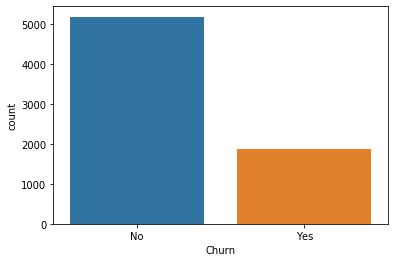

In [12]:
# Visualize the count of customer churn
sns.countplot(df['Churn'])

In [13]:
# What is the percentage of customers that are leaving
num_retained = df[df['Churn'] == 'No'].shape[0]
num_churned = df[df['Churn'] == 'Yes'].shape[0]

# Print the percetange of customers that stayed
print(num_retained / (num_retained + num_churned) * 100, '% of customers that stayed with the company')

# Print the percetange of customers that left
print(num_churned / (num_retained + num_churned) * 100, '% of customers that left with the company')

73.4630129206304 % of customers that stayed with the company
26.536987079369588 % of customers that left with the company


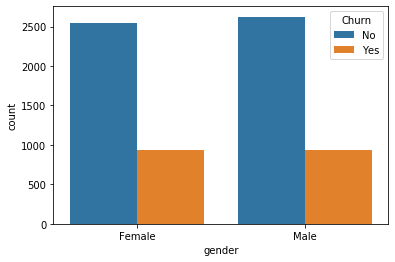

In [14]:
# Visualize the Churn count for both males and females
sns.countplot(x = 'gender', hue = 'Churn', data = df)

Gender doesn't tell us to much, so probably we don't need this Feature

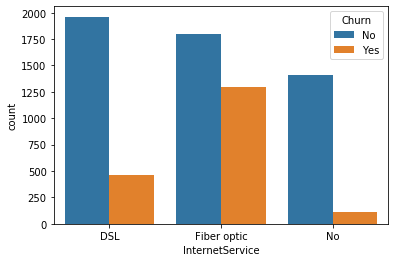

In [15]:
# Visualize the churn count for the internet service
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)

We have something interesting here, most of the customers that are staying have DSL and the customers that left have Fiber Optic.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e66b990>,
      dtype=object)

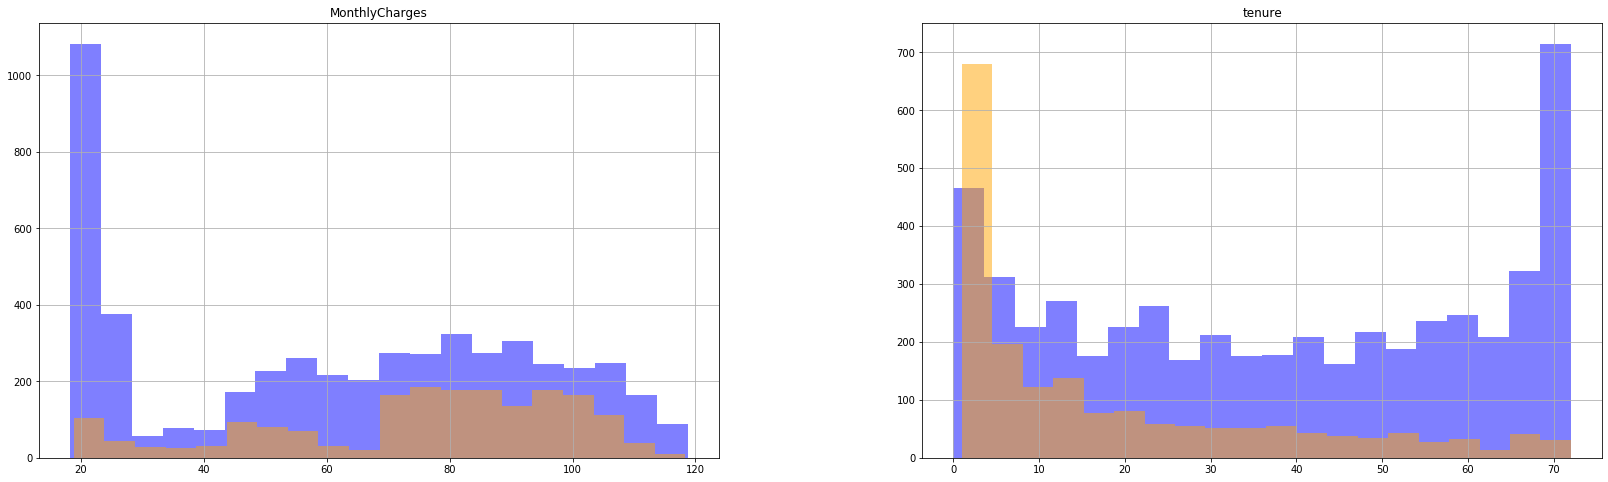

In [19]:
# Check other variables (Features) that are numerical
numerical_features = ['tenure', 'MonthlyCharges']

# Visualize these variables
fig, ax = plt.subplots(1, 2, figsize = (28, 8))
df[df['Churn'] == 'No'][numerical_features].hist(bins = 20, color = 'blue', alpha = 0.5, ax = ax)
df[df['Churn'] == 'Yes'][numerical_features].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax)

- A lot of customers that are staying pay 10-30 a month for the charges, people that pay more (70 to 100) are leaving
- Most of the customers that churn, churn between 0 and 10 months, customers that do not leave are between 65 to 70

So people that Churn pay a lot and have a low tenure

In [20]:
# Remove unnecessary columns (Features)
clean_df = df.drop('customerID', axis = 1)

In [21]:
# Look at the number of rows and columns in the dataset
clean_df.shape

(7043, 20)

In [23]:
# Convert all of the non numeric columns to numeric
for column in clean_df.columns:
    if clean_df[column].dtype == np.number:
        continue
    clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

In [24]:
# Take a look at the new dataset and data types
clean_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [25]:
# Show the first 5 rows of the new dataset
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [26]:
# Scaled the data
X = clean_df.drop('Churn', axis = 1) # Feature dataset
y = clean_df['Churn']

X = StandardScaler().fit_transform(X)

In [27]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Create the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Do some predictions on the test data
predictions = model.predict(X_test)

# Print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


Now we can look one by one the predictions and compare with the Target test data

In [30]:
# Check the precision, recall and f1-score for our model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



- Our model has a 91% recall which is very good, 85% precision which is ok and f1-score of 88% which is pretty good
- It has an accuracy of 82% which is better than the 73% of customers churn from guessing (see the statistics above)